string 分割成单词成为tokenization

Splitting a string into a list of words is known as tokenization. One of the most popular tokenization comes from NLTK (Natural Language Tool Kit).

In [1]:
import os
os.environ['all_proxy'] = "socks5://127.0.0.1:10808"

bow
词袋： 每个词在语料库的频率

In [2]:
import nltk
# nltk.set_proxy("socks5://127.0.0.1:10808")
# https://zhuanlan.zhihu.com/p/599003991 手动下载
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.tokenize import word_tokenize
sentence = "hi, how are you?"
sentence.split()
word_tokenize(sentence)

['hi', ',', 'how', 'are', 'you', '?']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# create a corpus of sentences
corpus = [
    "hello, how are you?",
    "im getting bored at home. And you? What do you think?",
    "did you know about counts",
    "let's see if this works!",
    "YES!!!!"
]
# initialize CountVectorizer
ctv = CountVectorizer()
# fit the vectorizer on corpus
ctv.fit(corpus)
corpus_transformed = ctv.transform(corpus)

In [5]:
print(corpus_transformed)

  (0, 2)	1
  (0, 9)	1
  (0, 11)	1
  (0, 22)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 22)	2
  (2, 0)	1
  (2, 5)	1
  (2, 6)	1
  (2, 14)	1
  (2, 22)	1
  (3, 12)	1
  (3, 15)	1
  (3, 16)	1
  (3, 18)	1
  (3, 20)	1
  (4, 21)	1


In [6]:
print(ctv.vocabulary_)

{'hello': 9, 'how': 11, 'are': 2, 'you': 22, 'im': 13, 'getting': 8, 'bored': 4, 'at': 3, 'home': 10, 'and': 1, 'what': 19, 'do': 7, 'think': 17, 'did': 6, 'know': 14, 'about': 0, 'counts': 5, 'let': 15, 'see': 16, 'if': 12, 'this': 18, 'works': 20, 'yes': 21}


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
# create a corpus of sentences
corpus = [
"hello, how are you?",
"im getting bored at home. And you? What do you think?",
"did you know about counts",
"let's see if this works!",
"YES!!!!"
]
# initialize CountVectorizer with word_tokenize from nltk
# as the tokenizer
ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
ctv.fit(corpus)
corpus_transformed = ctv.transform(corpus)
print(ctv.vocabulary_)

{'hello': 14, ',': 2, 'how': 16, 'are': 7, 'you': 27, '?': 4, 'im': 18, 'getting': 13, 'bored': 9, 'at': 8, 'home': 15, '.': 3, 'and': 6, 'what': 24, 'do': 12, 'think': 22, 'did': 11, 'know': 19, 'about': 5, 'counts': 10, 'let': 20, "'s": 1, 'see': 21, 'if': 17, 'this': 23, 'works': 25, '!': 0, 'yes': 26}


In [8]:
# import what we need
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer


# read the training data
df = pd.read_csv("./imdb/IMDB Dataset.csv")
# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# fetch labels
y = df.sentiment.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)

    test_df = df[df.kfold == fold_].reset_index(drop=True)
    # initialize CountVectorizer with NLTK's word_tokenize
    # function as tokenizer
    count_vec = CountVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )
    # fit count_vec on training data reviews
    count_vec.fit(train_df.review)
    # transform training and validation data reviews
    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)
    # initialize logistic regression model
    model = linear_model.LogisticRegression()
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Accuracy = 0.8918



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Accuracy = 0.893



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2
Accuracy = 0.8903



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3
Accuracy = 0.8949

Fold: 4
Accuracy = 0.8921



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# import what we need
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

# read the training data
df = pd.read_csv("./imdb/IMDB Dataset.csv")
# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# fetch labels
y = df.sentiment.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)

    test_df = df[df.kfold == fold_].reset_index(drop=True)
    # initialize CountVectorizer with NLTK's word_tokenize
    # function as tokenizer
    count_vec = CountVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )
    # fit count_vec on training data reviews
    count_vec.fit(train_df.review)
    # transform training and validation data reviews
    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)
    
    # 朴素贝叶斯，更快，NLP中用的更多
    # initialize naive bayes model
    model = naive_bayes.MultinomialNB()
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold: 0
Accuracy = 0.8493

Fold: 1
Accuracy = 0.8429

Fold: 2
Accuracy = 0.8478

Fold: 3
Accuracy = 0.8382

Fold: 4
Accuracy = 0.84



tf-idf

考虑逆词频，当一个词出现次数很少，就用idf加大权重，当一个词出现频率很大，就用逆词频减小权重

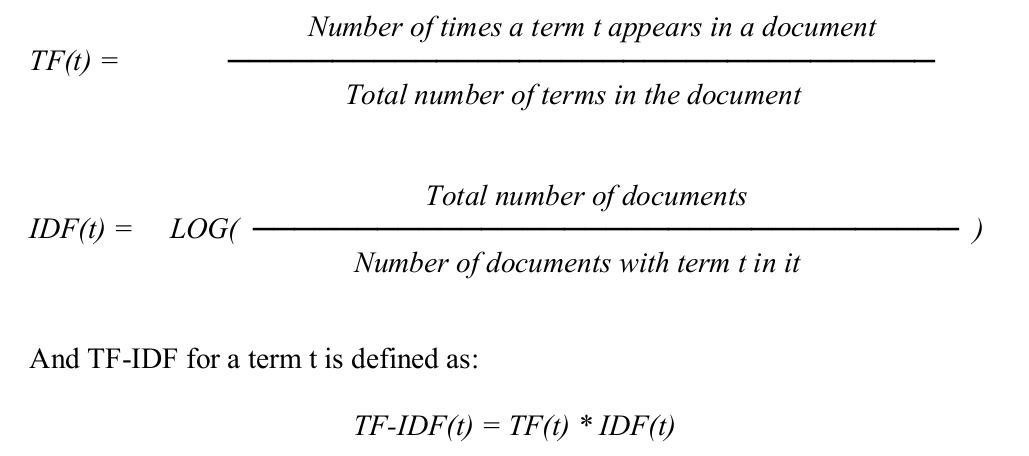

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
# create a corpus of sentences
corpus = [
    "hello, how are you?",
    "im getting bored at home. And you? What do you think?",
    "did you know about counts",
    "let's see if this works!",
    "YES!!!!"
]
# initialize TfidfVectorizer with word_tokenize from nltk
# as the tokenizer
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
tfv.fit(corpus)
corpus_transformed = tfv.transform(corpus)
print(corpus_transformed)

  (0, 27)	0.2965698850220162
  (0, 16)	0.4428321995085722
  (0, 14)	0.4428321995085722
  (0, 7)	0.4428321995085722
  (0, 4)	0.35727423026525224
  (0, 2)	0.4428321995085722
  (1, 27)	0.35299699146792735
  (1, 24)	0.2635440111190765
  (1, 22)	0.2635440111190765
  (1, 18)	0.2635440111190765
  (1, 15)	0.2635440111190765
  (1, 13)	0.2635440111190765
  (1, 12)	0.2635440111190765
  (1, 9)	0.2635440111190765
  (1, 8)	0.2635440111190765
  (1, 6)	0.2635440111190765
  (1, 4)	0.42525129752567803
  (1, 3)	0.2635440111190765
  (2, 27)	0.31752680284846835
  (2, 19)	0.4741246485558491
  (2, 11)	0.4741246485558491
  (2, 10)	0.4741246485558491
  (2, 5)	0.4741246485558491
  (3, 25)	0.38775666010579296
  (3, 23)	0.38775666010579296
  (3, 21)	0.38775666010579296
  (3, 20)	0.38775666010579296
  (3, 17)	0.38775666010579296
  (3, 1)	0.38775666010579296
  (3, 0)	0.3128396318588854
  (4, 26)	0.2959842226518677
  (4, 0)	0.9551928286692534


In [11]:
# import what we need
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

# read the training data
df = pd.read_csv("./imdb/IMDB Dataset.csv")
# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# fetch labels
y = df.sentiment.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)

    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # initialize TfidfVectorizer with NLTK's word_tokenize
    # function as tokenizer
    tfidf_vec = TfidfVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )
    # fit tfidf_vec on training data reviews
    tfidf_vec.fit(train_df.review)
    
    # transform training and validation data reviews
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)
    

    model = linear_model.LogisticRegression()
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold: 0
Accuracy = 0.8937

Fold: 1
Accuracy = 0.8939



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2
Accuracy = 0.8973

Fold: 3
Accuracy = 0.8983

Fold: 4
Accuracy = 0.8978



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N-grams are combinations of words in order.

In [12]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
# let's see 3 grams
N = 3
# input sentence
sentence = "hi, how are you?"
# tokenized sentence
tokenized_sentence = word_tokenize(sentence)
# generate n_grams
n_grams = list(ngrams(tokenized_sentence, N))
print(n_grams)

[('hi', ',', 'how'), (',', 'how', 'are'), ('how', 'are', 'you'), ('are', 'you', '?')]


n-gram 和 tf-idf一起用

In [13]:
# import what we need
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

# read the training data
df = pd.read_csv("./imdb/IMDB Dataset.csv")
# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# fetch labels
y = df.sentiment.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)

    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # initialize TfidfVectorizer with NLTK's word_tokenize
    # function as tokenizer
    tfidf_vec = TfidfVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None,
        ngram_range=(1, 3)
    )
    # fit tfidf_vec on training data reviews
    tfidf_vec.fit(train_df.review)
    
    # transform training and validation data reviews
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)
    

    model = linear_model.LogisticRegression()
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold: 0
Accuracy = 0.8943



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Accuracy = 0.8937



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2
Accuracy = 0.8915



/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3
Accuracy = 0.8919

Fold: 4
Accuracy = 0.8888



Stemming and lemmatization: 词干提取，词形还原

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()
# initialize stemmer
stemmer = SnowballStemmer("english")
words = ["fishing", "fishes", "fished"]
for word in words:
    print(f"word={word}")
    print(f"stemmed_word={stemmer.stem(word)}")
    print(f"lemma={lemmatizer.lemmatize(word)}")
    print("")

word=fishing
stemmed_word=fish
lemma=fishing

word=fishes
stemmed_word=fish
lemma=fish

word=fished
stemmed_word=fish
lemma=fished



Topic extraction
can be done using non-negative matrix factorization (NMF) or latent semantic
analysis (LSA), which is also popularly known as singular value decomposition or
SVD. These are decomposition techniques that reduce the data to a given number
of components. You can fit any of these on sparse matrix obtained from
CountVectorizer or TfidfVectorizer.

In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
# create a corpus of sentences
# we read only 10k samples from training data
# for this example
corpus = pd.read_csv("./imdb/IMDB Dataset.csv", nrows=10000)
corpus = corpus.review.values
# initialize TfidfVectorizer with word_tokenize from nltk
# as the tokenizer
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
tfv.fit(corpus)
# transform the corpus using tfidf
corpus_transformed = tfv.transform(corpus)
# initialize SVD with 10 components
svd = decomposition.TruncatedSVD(n_components=10)
# fit SVD
corpus_svd = svd.fit(corpus_transformed)
# choose first sample and create a dictionary
# of feature names and their scores from svd
# you can change the sample_index variable to
# get dictionary for any other sample
sample_index = 0
feature_scores = dict(
    zip(
        tfv.get_feature_names_out(),
        corpus_svd.components_[sample_index]
    )
)
# once we have the dictionary, we can now
# sort it in decreasing order and get the
# top N topics
N = 5
print(sorted(feature_scores, key=feature_scores.get, reverse=True)[:N])

['the', ',', '.', 'a', 'and']


In [22]:
corpus_svd.components_[sample_index]

array([-3.36499632e-05,  7.54662397e-01,  5.80854763e-03, ...,
        2.54111607e-04,  3.16457081e-05,  9.52717338e-05])

In [19]:
N = 5
for sample_index in range(5):
    feature_scores = dict(
        zip(
            tfv.get_feature_names_out(),
            corpus_svd.components_[sample_index]
        )
    )
    print(
        sorted(
            feature_scores,
            key=feature_scores.get,
            reverse=True
        )[:N]
    )

['the', ',', '.', 'a', 'and']
['br', '<', '>', '/', '-']
['i', 'movie', '!', 'it', 'was']
[',', '!', "''", '``', 'you']
['!', 'the', "''", '``', '...']


去掉特殊符号和空格，还可以去掉stop words

In [28]:
import re
import string
def clean_text(s):
    """
    This function cleans the text a bit
    :param s: string
    :return: cleaned string
    """
    # split by all whitespaces
    s = s.split()
    # join tokens by single space
    # why we do this?
    # this will remove all kinds of weird space
    # "hi.   how are you" becomes
    # "hi. how are you"
    s = " ".join(s)
    # remove all punctuations using regex and string module
    s = re.sub(f'[{re.escape(string.punctuation)}]', '', s)
    # you can add more cleaning here if you want
    # and then return the cleaned string
    return s

In [29]:
# create a corpus of sentences
# we read only 10k samples from training data
# for this example
corpus = pd.read_csv("./imdb/IMDB Dataset.csv", nrows=10000)
corpus.loc[:, "review"] = corpus.review.apply(clean_text)

In [32]:
# initialize TfidfVectorizer with word_tokenize from nltk
# as the tokenizer
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
tfv.fit(corpus)
# transform the corpus using tfidf
corpus_transformed = tfv.transform(corpus)
# initialize SVD with 10 components
svd = decomposition.TruncatedSVD(n_components=2)
# fit SVD
corpus_svd = svd.fit(corpus_transformed)
# choose first sample and create a dictionary
# of feature names and their scores from svd
# you can change the sample_index variable to
# get dictionary for any other sample
sample_index = 0
feature_scores = dict(
    zip(
        tfv.get_feature_names_out(),
        corpus_svd.components_[sample_index]
    )
)
# once we have the dictionary, we can now
# sort it in decreasing order and get the
# top N topics
N = 5
print(sorted(feature_scores, key=feature_scores.get, reverse=True)[:N])

['review', 'sentiment']


In [33]:
import numpy as np
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer):
    """
    Given a sentence and other information,
    this function returns embedding for the whole sentence
    :param s: sentence, string
    :param embedding_dict: dictionary word:vector
    :param stop_words: list of stop words, if any
    :param tokenizer: a tokenization function
    """
    # convert sentence to string and lowercase it
    words = str(s).lower()
    # tokenize the sentence
    words = tokenizer(words)
    # remove stop word tokens
    words = [w for w in words if not w in stop_words]
    # keep only alpha-numeric tokens
    words = [w for w in words if w.isalpha()]
    # initialize empty list to store embeddings
    M = []
    for w in words:
        # for every word, fetch the embedding from
        # the dictionary and append to list of
        # embeddings
        if w in embedding_dict:
            M.append(embedding_dict[w])
    # if we dont have any vectors, return zeros
    if len(M) == 0:
        return np.zeros(300)
    # convert list of embeddings to array
    M = np.array(M)
    # calculate sum over axis=0
    v = M.sum(axis=0)
    # return normalized vector
    return v / np.sqrt((v ** 2).sum())

In [36]:
# fasttext.py
import io
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

def load_vectors(fname):
    # taken from: https://fasttext.cc/docs/en/english-vectors.html
    fin = io.open(
        fname,
        'r',
        encoding='utf-8',
        newline='\n',
        errors='ignore'
    )
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = list(map(float, tokens[1:]))
    return data

df = pd.read_csv("./imdb/IMDB Dataset.csv")

# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# load embeddings into memory
print("Loading embeddings")
embeddings = load_vectors("./imdb/crawl-300d-2M.vec")
# create sentence embeddings
print("Creating sentence vectors")
vectors = []
for review in df.review.values:
    vectors.append(
        sentence_to_vec(
            s = review,
            embedding_dict = embeddings,
            stop_words = [],
            tokenizer = word_tokenize
        )
    )
vectors = np.array(vectors)
# fetch labels
y = df.sentiment.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for fold_, (t_, v_) in enumerate(kf.split(X=vectors, y=y)):
    print(f"Training fold: {fold_}")
    # temporary dataframes for train and test
    xtrain = vectors[t_, :]
    ytrain = y[t_]
    xtest = vectors[v_, :]
    ytest = y[v_]
    # initialize logistic regression model
    model = linear_model.LogisticRegression()
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, ytrain)
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    # calculate accuracy
    accuracy = metrics.accuracy_score(ytest, preds)
    print(f"Accuracy = {accuracy}")
    print("")

Loading embeddings
Creating sentence vectors
Training fold: 0


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy = 0.8619

Training fold: 1
Accuracy = 0.8616

Training fold: 2
Accuracy = 0.863

Training fold: 3
Accuracy = 0.8618

Training fold: 4
Accuracy = 0.8561



双向lstm

In [ ]:
# create_folds.py
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
def create_folds():
    # Read training data
    df = pd.read_csv("../input/imdb.csv")
    # map positive to 1 and negative to 0
    df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
    )
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # fetch labels
    y = df.sentiment.values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
    # save the new csv with kfold column
    df.to_csv("../input/imdb_folds.csv", index=False)
    
    
import torch
class IMDBDataset:
    def __init__(self, reviews, targets):
        """
        :param reviews: this is a numpy array
        :param targets: a vector, numpy array
        """
        self.reviews = reviews
        self.target = targets
    def __len__(self):
        # returns length of the dataset
        return len(self.reviews)
    def __getitem__(self, item):
        # for any given item, which is an int,
        # return review and targets as torch tensor
        # item is the index of the item in concern
        review = self.reviews[item, :]
        target = self.target[item]
        return {  
                "review": torch.tensor(review, dtype=torch.long),
                "target": torch.tensor(target, dtype=torch.float)
        }

# lstm.py
import torch
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        """
        :param embedding_matrix: numpy array with vectors for all words
        """
        super(LSTM, self).__init__()
        # number of words = number of rows in embedding matrix
        num_words = embedding_matrix.shape[0]
        # dimension of embedding is num of columns in the matrix
        embed_dim = embedding_matrix.shape[1]
        # we define an input embedding layer
        self.embedding = nn.Embedding(
            num_embeddings=num_words,
            embedding_dim=embed_dim
        )
        # embedding matrix is used as weights of
        # the embedding layer
        self.embedding.weight = nn.Parameter(
            torch.tensor(
                embedding_matrix,
                dtype=torch.float32
            )
        )
        # we dont want to train the pretrained embeddings
        self.embedding.weight.requires_grad = False
        # a simple bidirectional LSTM with
        # hidden size of 128
        self.lstm = nn.LSTM(
            embed_dim,
            128,
            bidirectional=True,
            batch_first=True,
        )
        # output layer which is a linear layer
        # we have only one output
        # input (512) = 128 + 128 for mean and same for max pooling
        self.out = nn.Linear(512, 1)
        
    def forward(self, x):
        # pass data through embedding layer
        # the input is just the tokens
        x = self.embedding(x)
        # move embedding output to lstm
        x, _ = self.lstm(x)
        # apply mean and max pooling on lstm output
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        # concatenate mean and max pooling
        # this is why size is 512
        # 128 for each direction = 256
        # avg_pool = 256 and max_pool = 256
        out = torch.cat((avg_pool, max_pool), 1)
        # pass through the output layer and return the output
        out = self.out(out)
        # return linear output
        return out
        

# engine.py
import torch
import torch.nn as nn
def train(data_loader, model, optimizer, device):
    """    
    This is the main training function that trains model
    for one epoch
    :param data_loader: this is the torch dataloader
    :param model: model (lstm model)
    :param optimizer: torch optimizer, e.g. adam, sgd, etc.
    :param device: this can be "cuda" or "cpu"
    """
    # set model to training mode
    model.train()
    # go through batches of data in data loader
    for data in data_loader:
        # fetch review and target from the dict
        reviews = data["review"]
        targets = data["target"]
        # move the data to device that we want to use
        reviews = reviews.to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.float)
        # clear the gradients
        optimizer.zero_grad()
        # make predictions from the model
        predictions = model(reviews)
        # calculate the loss
        loss = nn.BCEWithLogitsLoss()(
        predictions,
        targets.view(-1, 1)
        )
        # compute gradient of loss w.r.t.
        # all parameters of the model that are trainable
        loss.backward()
        # single optimization step
        optimizer.step()

def evaluate(data_loader, model, device):
    # initialize empty lists to store predictions
    # and targets
    final_predictions = []
    final_targets = []
    # put the model in eval mode 
    model.eval()
    # disable gradient calculation
    with torch.no_grad():
        for data in data_loader:
            reviews = data["review"]
            targets = data["target"]
            reviews = reviews.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.float)
            # make predictions
            predictions = model(reviews)
            # move predictions and targets to list
            # we need to move predictions and targets to cpu too
            predictions = predictions.cpu().numpy().tolist()
            targets = data["target"].cpu().numpy().tolist()
            final_predictions.extend(predictions)
            final_targets.extend(targets)
    # return final predictions and targets
    return final_predictions, final_targets

# train.py
import io
import torch
import numpy as np
import pandas as pd
# yes, we use tensorflow
# but not for training the model!
import tensorflow as tf
from sklearn import metrics
import config
import dataset
import engine
import lstm

def load_vectors(fname):
    # taken from: https://fasttext.cc/docs/en/english-vectors.html
    fin = io.open(
        fname,
        'r',
        encoding='utf-8',
        newline='\n',
        errors='ignore'
    )
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = list(map(float, tokens[1:]))
    return data

def create_embedding_matrix(word_index, embedding_dict):
    """
    This function creates the embedding matrix.
    :param word_index: a dictionary with word:index_value
    :param embedding_dict: a dictionary with word:embedding_vector
    :return: a numpy array with embedding vectors for all known words
    """
    # initialize matrix with zeros
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    # loop over all the words
    for word, i in word_index.items():
        # if word is found in pre-trained embeddings,
        # update the matrix. if the word is not found,
        # the vector is zeros!
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]
    # return embedding matrix
    return embedding_matrix

def run(df, fold):
    """
    Run training and validation for a given fold
    and dataset
    :param df: pandas dataframe with kfold column
    :param fold: current fold, int
    """
    # fetch training dataframe
    train_df = df[df.kfold != fold].reset_index(drop=True)
    # fetch validation dataframe
    valid_df = df[df.kfold == fold].reset_index(drop=True)
    print("Fitting tokenizer")
    # we use tf.keras for tokenization
    # you can use your own tokenizer and then you can
    # get rid of tensorflow
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(df.review.values.tolist())
    # convert training data to sequences
    # for example : "bad movie" gets converted to
    # [24, 27] where 24 is the index for bad and 27 is the
    # index for movie
    xtrain = tokenizer.texts_to_sequences(train_df.review.values)
    # similarly convert validation data to
    # sequences
    xtest = tokenizer.texts_to_sequences(valid_df.review.values)
    # zero pad the training sequences given the maximum length
    # this padding is done on left hand side
    # if sequence is > MAX_LEN, it is truncated on left hand side too
    xtrain = tf.keras.preprocessing.sequence.pad_sequences(
        xtrain, maxlen=config.MAX_LEN
    )
    # zero pad the validation sequences
    xtest = tf.keras.preprocessing.sequence.pad_sequences(
        xtest, maxlen=config.MAX_LEN
    )
    # initialize dataset class for training
    train_dataset = dataset.IMDBDataset(
        reviews=xtrain,
        targets=train_df.sentiment.values
    )
    # create torch dataloader for training
    # torch dataloader loads the data using dataset
    # class in batches specified by batch size
    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=config.TRAIN_BATCH_SIZE,
        num_workers=2
    )
    # initialize dataset class for validation
    valid_dataset = dataset.IMDBDataset(
        reviews=xtest,
        targets=valid_df.sentiment.values
    )
    # create torch dataloader for validation
    valid_data_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=config.VALID_BATCH_SIZE,
        num_workers=1
    )
    print("Loading embeddings")
    # load embeddings as shown previously
    embedding_dict = load_vectors("../input/crawl-300d-2M.vec")
    embedding_matrix = create_embedding_matrix(
    tokenizer.word_index, embedding_dict
    )
    # create torch device, since we use gpu, we are using cuda
    device = torch.device("cuda")
    # fetch our LSTM model
    model = lstm.LSTM(embedding_matrix)
    # send model to device
    model.to(device)
    # initialize Adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    print("Training Model")
    # set best accuracy to zero
    best_accuracy = 0
    # set early stopping counter to zero
    early_stopping_counter = 0
    # train and validate for all epochs
    for epoch in range(config.EPOCHS):
        # train one epoch
        engine.train(train_data_loader, model, optimizer, device)
        # validate
        outputs, targets = engine.evaluate(
            valid_data_loader, model, device
        )
        # use threshold of 0.5
        # please note we are using linear layer and no sigmoid
        # you should do this 0.5 threshold after sigmoid
        outputs = np.array(outputs) >= 0.5
        # calculate accuracy
        accuracy = metrics.accuracy_score(targets, outputs)
        print(
            f"FOLD:{fold}, Epoch: {epoch}, Accuracy Score = {accuracy}"
        )
        # simple early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
        else:
            early_stopping_counter += 1
        if early_stopping_counter > 2:
            break

# load data
df = pd.read_csv("../input/imdb_folds.csv")
# train for all folds
run(df, fold=0)
run(df, fold=1)
run(df, fold=2)
run(df, fold=3)
run(df, fold=4)